In [1]:
from numpy import sqrt, shape, array, exp, log, linspace, cos, sin, zeros
from random import random, randrange, uniform
from matplotlib.pyplot import plot, show, scatter, xlabel, ylabel, title, legend, figure, savefig
from math import pi
from tqdm import trange, tqdm

In [2]:
x = 0
for n in trange(1000000):
    x+=1

100%|███████████████████████████████████████████████████████████████████| 1000000/1000000 [00:00<00:00, 1129606.94it/s]


In [3]:
def distance(r1, r2): # calculates the distance modulus
    dis = sqrt((r1[0] - r2[0])**2 + (r1[1] - r2[1])**2)
    return dis

In [4]:
def energy(r):  # calculates the energy of a system of charged particles 
    N , a = shape(r)
    sum = 0
    for i in range(N):
        for j in range(N):
            if i!=j:
                dis = sqrt((r[i,0] - r[j,0])**2 + (r[i,1] - r[j,1])**2)
                sum+= 1/dis
    return sum/2

In [5]:
p = array([[0,0],[1,1]], float)
p
a,b=shape(p)
print(a,b, p[1,1])

2 2 1.0


In [6]:
energy(p)

0.7071067811865475

In [7]:
distance(p[0,:], p[1,:])

1.4142135623730951

In [8]:
def force(r, i):  # calculates force one of the particle feels from the rest
    N , a = shape(r)
    sum = 0
    for j in range(i):
        dis = distance(r[i,:], r[j,:])
        sum+= (r[i,:] - r[j,:])/dis**3
    for j in range(i+1, N):
        dis = distance(r[i,:], r[j,:])
        sum+= (r[i,:] - r[j,:])/dis**3
    return sum 

In [9]:
force(p, 0)

array([-0.35355339, -0.35355339])

We are going to make a change so that it only returns the force vector direction (normalized to unity).

In [10]:
def force_vector(r, i):  # calculates force vector direction one of the particle feels from the rest
    N , a = shape(r)
    sum = 0
    for j in range(i):
        sum+= 1/(r[i,:] - r[j,:])
    for j in range(i+1, N):
        sum+= 1/(r[i,:] - r[j,:])
    vec = sum/distance(sum, [0,0])
    return vec

In [11]:
B = array([[0,0],[1,1],[-0.5,-0.5]], float)
force_vector(B, 0)

array([0.70710678, 0.70710678])

I have changed the function circle. Before it had a shape to act on whole position array. Now it only has a len so it can act individually on each particle.

In [12]:
def circle(r):
    N, a = shape(r)
    for i in range(N):
        dis = sqrt(r[i,0]**2 + r[i,1]**2)
        if dis<1.0:
            continue
        else:
            return False
    return True

In [13]:
def circle_ind(r):
    N = len(r)
    dis = sqrt(r[0]**2 + r[1]**2)
    if dis<1.0:
        return True
    else:
        return False

In [14]:
A = array([[0,0],[0.8,0.8]], float)
circle_ind(A[1,:])

False

In [15]:
def random_step(r, c): 
    N, a = shape(r)  # r is the position of particles array
    for i in range(N):   # c is the amount we are willing to move the particle
        z = zeros(2,float)
        for j in range(a):
            z[j] = r[i,j] + uniform(-c, c)
            if circle_ind(z)==True:
                r[i,j] = z[j]
    return r

In [16]:
p = array([[0,0],[0.7,0.7]], float)
random_step(p,0.1)

array([[-0.06994366, -0.08160262],
       [ 0.68075648,  0.66155462]])

In [17]:
def biased_step(r, c):
    # in this fucntion, the displacement of a particle is the combination of the force and stochastic noise
    N, a = shape(r)  # r is the position of particles array
    for i in range(N):   # c is the amount we are willing to move the particle
        z = r[i,:] + c*force_vector(r,i) + [uniform(-c, c), uniform(-c, c)]
        if circle_ind(z)==True:
            r[i,:] = z
    return r

In [18]:
biased_step(p, 0.01)

array([[-0.07099297, -0.08845285],
       [ 0.68893688,  0.67473739]])

In [19]:
def step_SA(r, T, niter_T, f, c):
    E = energy(r)
    for n in range(niter_T):
        r_step = f(r,c)
        E_step = energy(r_step)
        q = exp((E - E_step)/T)
        U = random()
        if U<q: 
            r = r_step
            E = E_step
    return r, E

In [20]:
r1,E1 = step_SA(p, 10, 100, random_step, 0.2)

[[ 0.72301687  0.73723906]
 [ 0.01213913 -0.10613603]] 0.9066109729832067


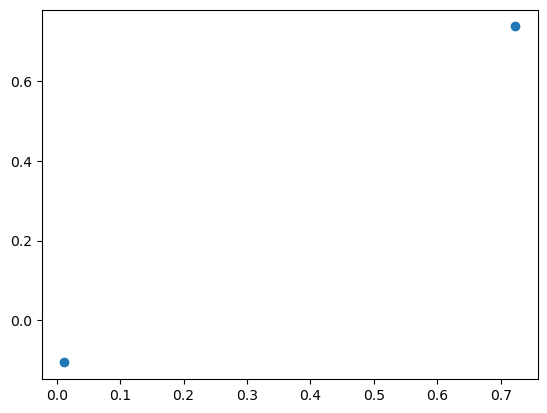

In [21]:
print(r1, E1)
scatter(r1[:,0], r1[:,1])

In [22]:
def energy_opt(r0, Tmax, Tmin, tau, g, c, f, niter_T, maxiter):
    # g is the function for temperature annealing
    # f is the method to actualize particles
    r = r0
    E = energy(r0)
    T = Tmax
    #while T>Tmin and t<maxiter:
    for t in tqdm(range(maxiter)):
        r, E = step_SA(r, T, niter_T, g, c)
        T = f(t, tau, Tmax)
        #scatter(r[:,0], r[:,1])
    return r, E, T

In [23]:
def temp_exp(t, tau, Tmax):
    return Tmax*exp(-t/tau)

Analoga a la funcion de Marta y la del paper de multiplicar cada vez por cte.

In [24]:
def temp_power(t, tau, Tmax):
    return Tmax*(tau)**t

In [25]:
temp_power(10,0.9,100)

34.86784401000001

In [26]:
def temp_log(t, d, Tmax):
    return Tmax/log(t+d)

In [27]:
temp_log(10,0.9,100)

41.8626748753152

In [28]:
zeros((2,2),float)

array([[0., 0.],
       [0., 0.]])

In [29]:
def random_initial(N):
    r = zeros((N,2),float)
    for i in range(N):
        r[i,:] = array([random() - 0.5, random() - 0.5],float)*1.4
    return r

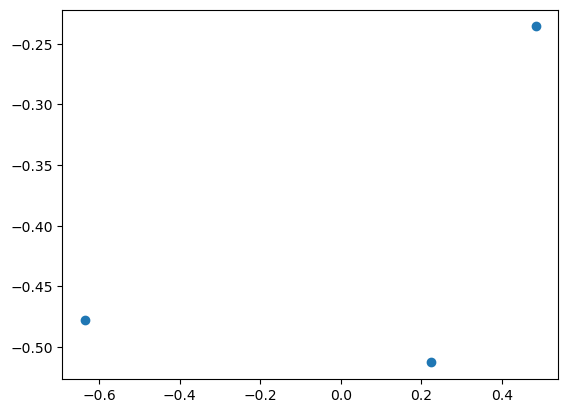

In [30]:
r = random_initial(3)
scatter(r[:,0], r[:,1])

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.28it/s]


[[-0.07090083  0.56612717]
 [-0.218405   -0.05366599]
 [-0.32475976  0.20822192]] 6.382481642058517 1.7179250691067063


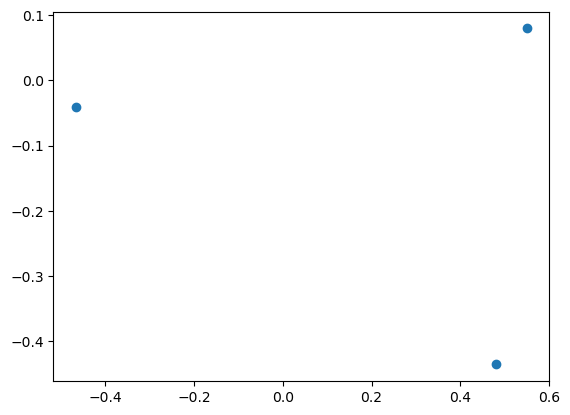

In [54]:
r0 = random_initial(3)
scatter(r0[:,0], r0[:,1])
Tmax = 300
Tmin = 1
tau = 0.9 
c = 0.1
niter_T = 300
maxiter = 50

r2,E2, T2 = energy_opt(r0, Tmax, Tmin, tau, random_step, c, temp_power, niter_T, maxiter)
print(r2,E2,T2)

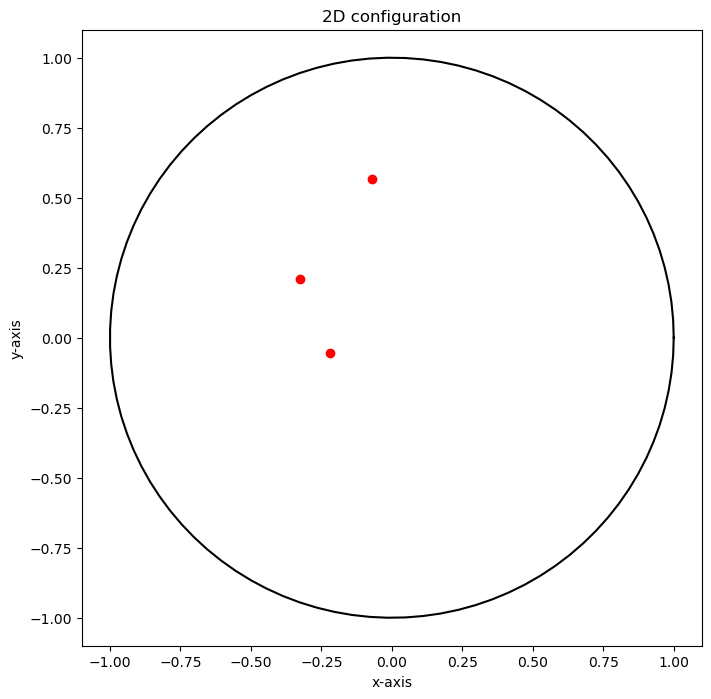

In [55]:
xaxis = []
yaxis = []

theta = linspace(0,2*pi,100)
for th in theta:
    xaxis.append(cos(th))
    yaxis.append(sin(th))

figure(figsize = (8,8))
plot(xaxis,yaxis,color = 'black')
scatter(r2[:,0],r2[:,1],color = 'red')
xlabel('x-axis')
ylabel('y-axis')
title('2D configuration')
#savefig(f'12 particles')
show()

We will now study the effect on the Markov chain length on convergence.

In [84]:
N = 5
r0 = random_initial(N)
Tmax = 500
Tmin = 1
tau = 0.9 
c = 0.05
niter_T = 1
maxiter = 10000

r3,E3, T3 = energy_opt(r0, Tmax, Tmin, tau, biased_step, c, temp_power, niter_T, maxiter)
print(r3,E3,T3)

  1%|▋                                                                             | 94/10000 [00:00<00:11, 886.28it/s]C:\Users\Usuario\AppData\Local\Temp\ipykernel_4244\3979402265.py:6: RuntimeWarning: overflow encountered in exp
  q = exp((E - E_step)/T)
 67%|██████████████████████████████████████████████████▎                        | 6704/10000 [00:05<00:02, 1298.59it/s]C:\Users\Usuario\AppData\Local\Temp\ipykernel_4244\3979402265.py:6: RuntimeWarning: overflow encountered in scalar divide
  q = exp((E - E_step)/T)
 70%|████████████████████████████████████████████████████▎                      | 6969/10000 [00:05<00:02, 1281.95it/s]C:\Users\Usuario\AppData\Local\Temp\ipykernel_4244\3979402265.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  q = exp((E - E_step)/T)
100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1294.94it/s]

[[ 0.12000908 -0.63448261]
 [-0.26663496 -0.96159717]
 [-0.9273854   0.34021747]
 [ 0.99898434 -0.03768343]
 [ 0.44240677  0.89360655]] 8.189643860661871 0.0


In [86]:
print(T3)

0.0


In [81]:
r0 = random_initial(N)
niter_T = 100
maxiter = 100

r4, E4, T4 = energy_opt(r0, Tmax, Tmin, tau, biased_step, c, temp_power, niter_T, maxiter)
print(r4, E4, T4)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.19it/s]


[[-0.47446445  0.49362379]
 [-0.70003919  0.70795701]
 [-0.0110695   0.0773907 ]
 [ 0.329272   -0.92264735]
 [ 0.94015486 -0.33950935]] 10.74268577186012 0.014756332715326413


In [88]:
r0 = random_initial(N)
niter_T = 200
maxiter = 100

r5, E5, T5 = energy_opt(r0, Tmax, Tmin, tau, biased_step, c, temp_power, niter_T, maxiter)
print(r5, E5, T5)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.70it/s]

[[ 0.34879225  0.93545661]
 [ 0.87708807 -0.47970904]
 [-0.95700899  0.2858531 ]
 [-0.02773706 -0.99440374]
 [-0.67721196 -0.05028386]] 8.071228219559078 0.014756332715326413


In [89]:
print(T5)

0.014756332715326413


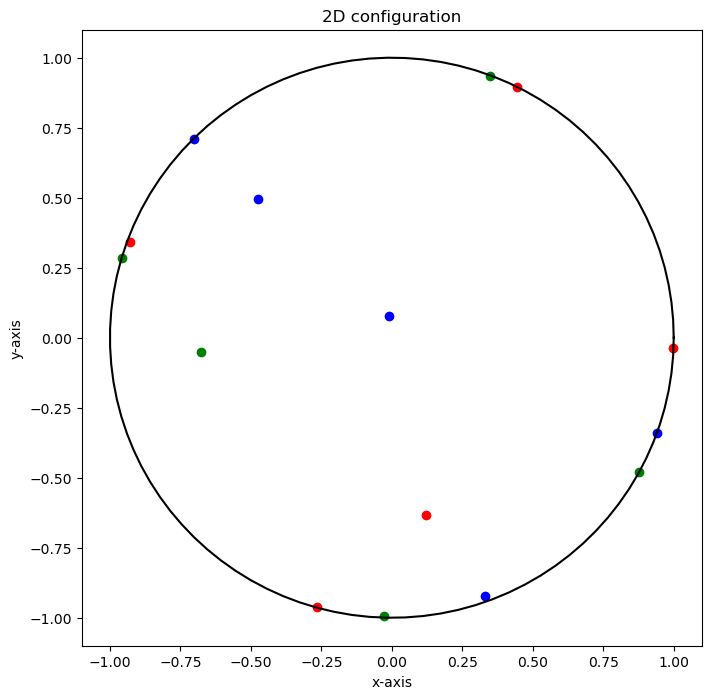

In [90]:
xaxis = []
yaxis = []

theta = linspace(0,2*pi,100)
for th in theta:
    xaxis.append(cos(th))
    yaxis.append(sin(th))

figure(figsize = (8,8))
plot(xaxis,yaxis,color = 'black')
scatter(r3[:,0],r3[:,1],color = 'red', marker = "o")
scatter(r4[:,0],r4[:,1],color = 'blue', marker = "o")
scatter(r5[:,0],r5[:,1],color = 'green', marker = "o")
xlabel('x-axis')
ylabel('y-axis')
title('2D configuration')
show()